**Exercise 1**

In [1]:
import os
import tensorflow as tf
base_dir = 'horse-or-human'

In [2]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

num_training_images = sum([len(images) for images, _ in train_data])
num_validation_images = sum([len(images) for images, _ in val_data])

print(f"Number of training images: {num_training_images}")
print(f"Number of validation images: {num_validation_images}")

Found 1027 files belonging to 2 classes.
Using 822 files for training.
Found 1027 files belonging to 2 classes.
Using 205 files for validation.
Number of training images: 822
Number of validation images: 205


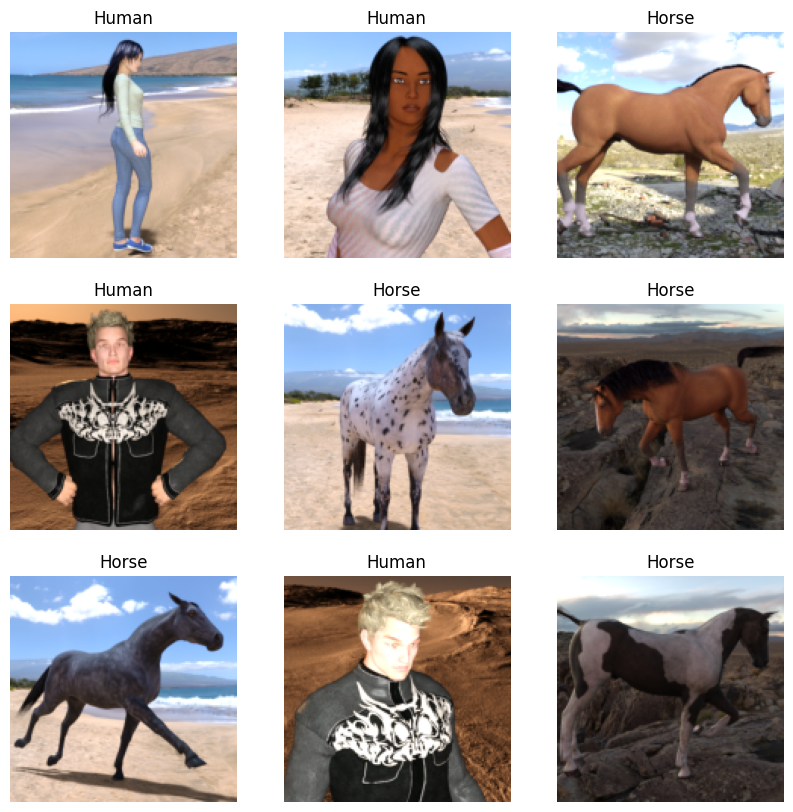

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Horse" if labels[i] == 0 else "Human")
        plt.axis("off")
plt.show()

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(train_data, validation_data=val_data, epochs=10)
train_accuracy_cnn = history_cnn.history['accuracy'][-1]
val_accuracy_cnn = history_cnn.history['val_accuracy'][-1]
print(f"CNN (Without Augmentation) - Training Accuracy: {train_accuracy_cnn}, Validation Accuracy: {val_accuracy_cnn}")

Epoch 1/10


C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.6403 - loss: 113.4654 - val_accuracy: 0.9366 - val_loss: 0.1757
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 0.9449 - loss: 0.1559 - val_accuracy: 0.9854 - val_loss: 0.0401
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - accuracy: 0.9813 - loss: 0.0946 - val_accuracy: 0.9854 - val_loss: 0.0661
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.9949 - loss: 0.0133 - val_accuracy: 0.9854 - val_loss: 0.0530
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9902 - val_loss: 0.0297
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.9728 - loss: 0.1948 - val_accuracy: 0.9366 - val_loss: 0.3831
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 282ms/step - accuracy: 0.9193 - loss: 0.8787 - val_accuracy: 0.9805 - val_loss: 0.0787
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 672ms/step - accuracy: 0.9940 - loss: 0.0327 - val_accuracy: 0.9951 - 

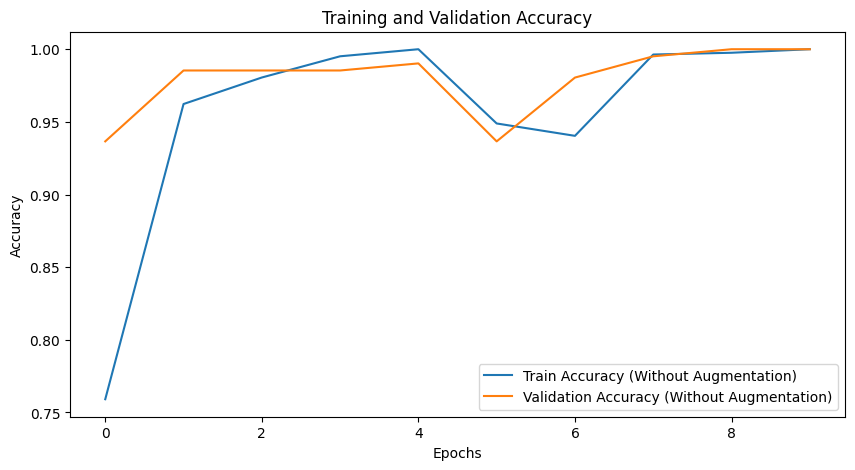

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy (Without Augmentation)')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy (Without Augmentation)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

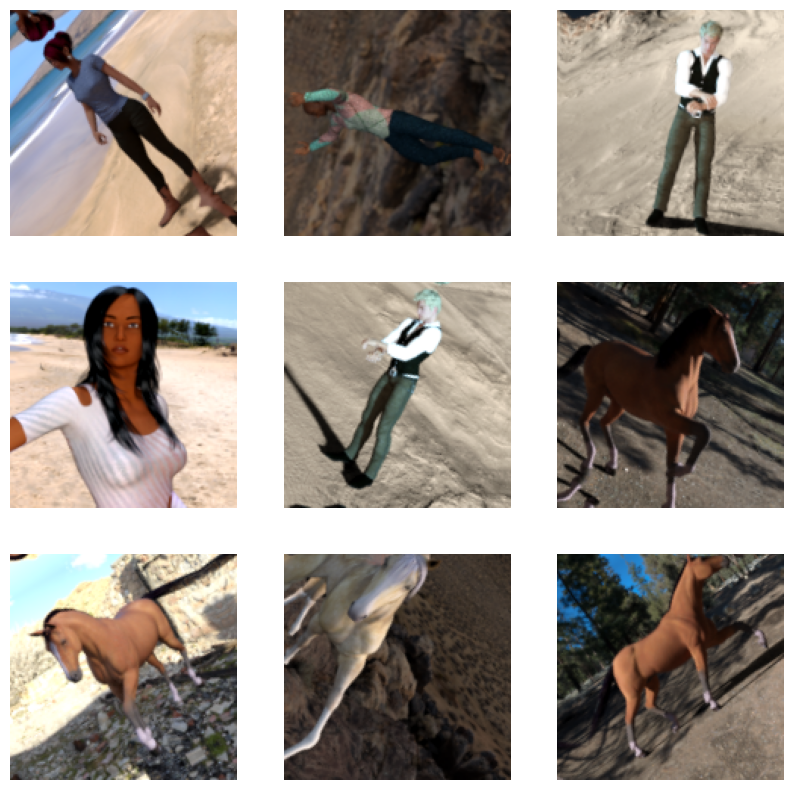

In [6]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomContrast

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomContrast(0.2),
])

for images, _ in train_data.take(1):
    augmented_images = data_augmentation(images)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(train_data, validation_data=val_data, epochs=10)
train_accuracy_cnn = history_cnn.history['accuracy'][-1]
val_accuracy_cnn = history_cnn.history['val_accuracy'][-1]
print(f"CNN (With Augmentation) - Training Accuracy: {train_accuracy_cnn}, Validation Accuracy: {val_accuracy_cnn}")

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 700ms/step - accuracy: 0.6213 - loss: 1.1204 - val_accuracy: 0.9122 - val_loss: 0.1606
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 688ms/step - accuracy: 0.9502 - loss: 0.1433 - val_accuracy: 0.9756 - val_loss: 0.0643
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 684ms/step - accuracy: 0.9779 - loss: 0.0521 - val_accuracy: 0.9512 - val_loss: 0.0892
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 689ms/step - accuracy: 0.9691 - loss: 0.0883 - val_accuracy: 0.9951 - val_loss: 0.0212
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 687ms/step - accuracy: 0.9973 - loss: 0.0165 - val_accuracy: 0.9805 - val_loss: 0.0346
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 498ms/step - accuracy: 0.9949 - loss: 0.0237 - val_accuracy: 0.9854 - val_loss: 0.0400
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 281ms/step - accuracy: 0.9876 - loss: 0.0280 - val_accuracy: 0.9854 - val_loss: 0.0367
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 281ms/step - accuracy: 0.9963 - loss: 0.0166 - val_accura

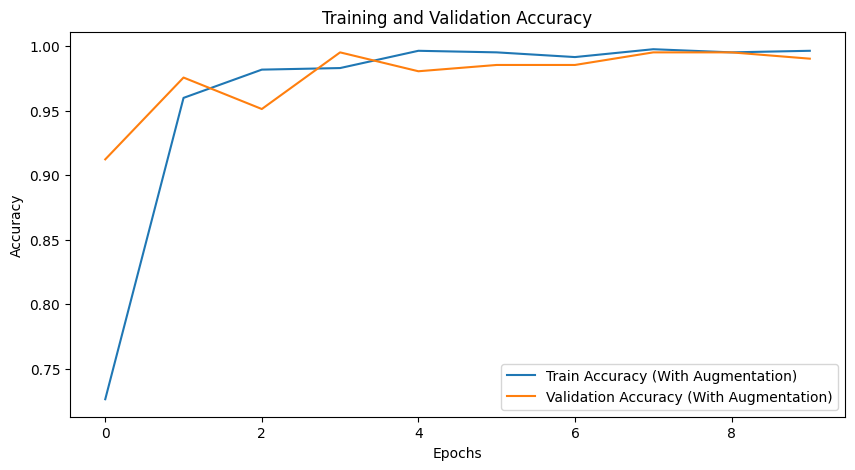

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy (With Augmentation)')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
import torchvision
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
faster_rcnn_model = fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.to(device)

C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\sselc/.cache\torch\hub\checkpoints\fasterrcnn_resn

RuntimeError: invalid hash value (expected "258fb6c6", got "21e908c4fe7365eb06339589ec28badaf47f1aceb73cb3483538b39d0d483cc4")

In [21]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/weareinlab/model/main/q17.ipynb", "q17.ipynb")

('q17.ipynb', <http.client.HTTPMessage at 0x181d5939950>)